In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import itertools
from z3 import *

### Puzzle as published
https://www.janestreet.com/puzzles/block-party-4-index/

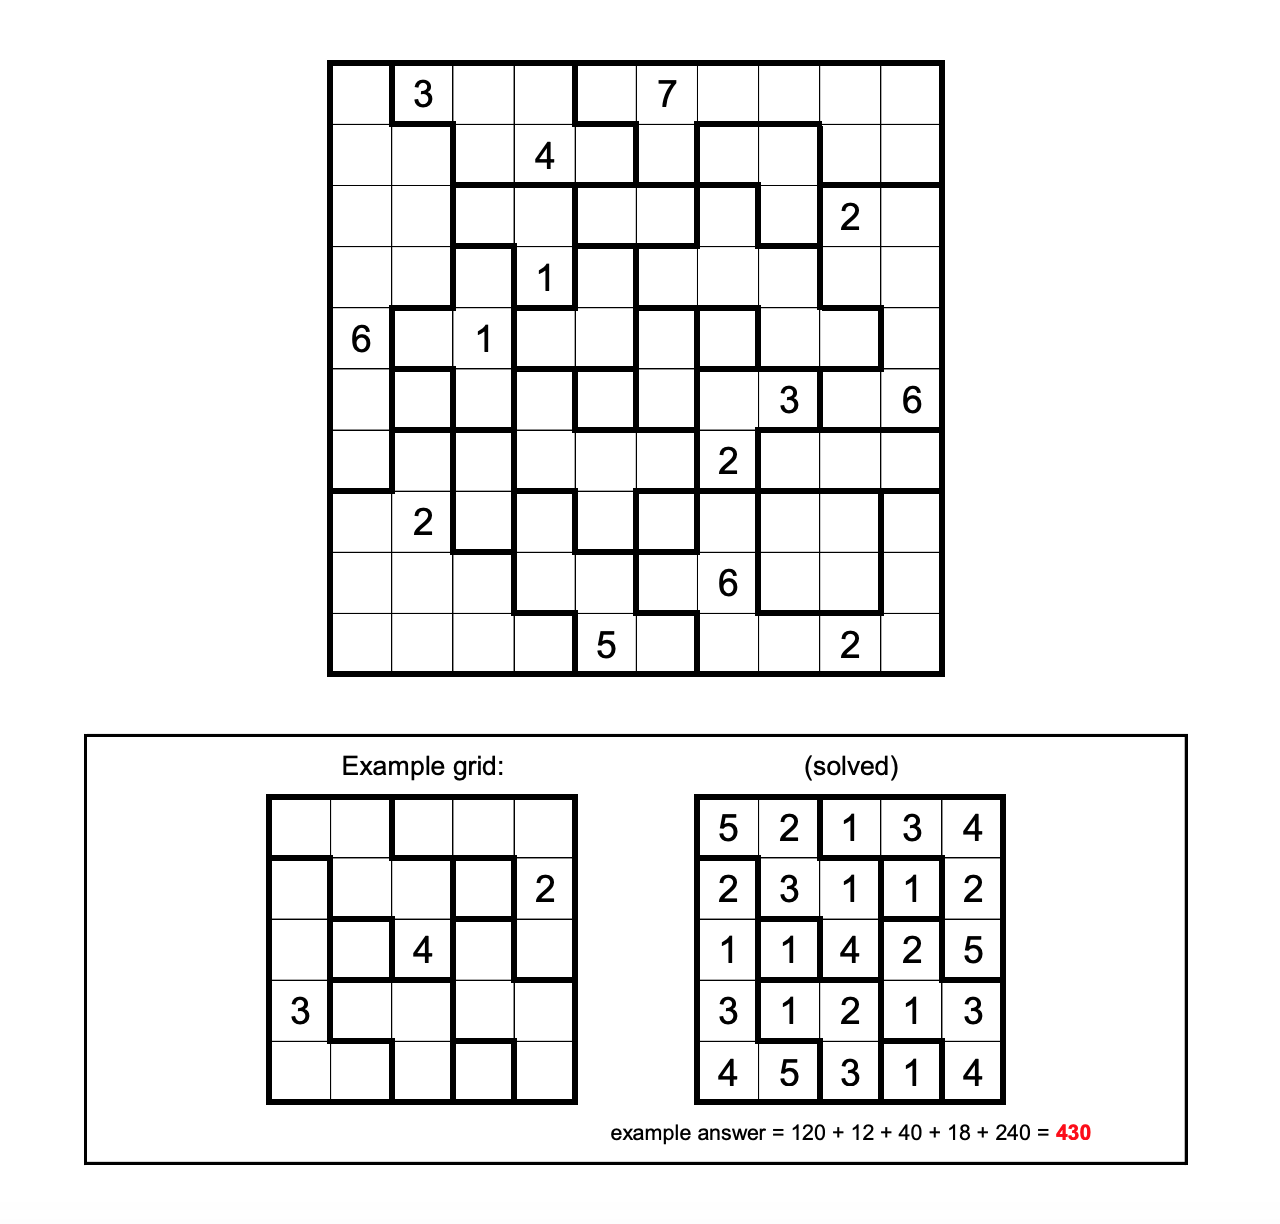

In [2]:
url='https://www.janestreet.com/puzzles/block-party-4-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published\n'+url))
img = "<img src=\"/puzzles/block-party-4.png\"/>"
display(HTML(str(soup.find_all('div', {'class' :'col-12'})[4])))
display(Image("https://www.janestreet.com/puzzles/block-party-4.png",width=300))

In [3]:
groups=np.array([[ 0,18,18,18, 2, 2, 2, 2, 2, 2],
                 [ 0, 0,18,18,18, 2, 3, 3, 2, 2],
                 [ 0, 0, 4, 4, 5, 5, 6, 3, 7, 7],
                 [ 0, 0, 9, 4, 8, 6, 6, 6, 7, 7],
                 [ 0, 9, 9, 8, 8,10,11, 6, 6, 7],
                 [ 0,12, 9,13,14,10,15,15, 7, 7],
                 [ 0,17, 1,13,13,13,15,16,16,16],
                 [17,17, 1,19,13,21,20,22,22,20],
                 [17,17,17,19,19,20,20,22,22,20],
                 [17,17,17,17,19,19,20,20,20,20]],dtype=int)

fixed =np.array([[0, 3, 0, 0, 0, 7, 0, 0, 0, 0],
                 [0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [6, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 3, 0, 6],
                 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
                 [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
                 [0, 0, 0, 0, 5, 0, 0, 0, 2, 0]],dtype=int) 


groups1 = np.array([[0, 0, 1, 1, 1],
                    [2, 0, 0, 3, 1],
                    [2, 4, 0, 5, 1],
                    [2, 6, 6, 5, 5],
                    [2, 2, 6, 7, 5]])

fixed1 = np.array([[0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 2],
                   [0, 0, 4, 0, 0],
                   [3, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])


def grid_print(groups,numbers):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array((numbers).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(groups,annot=x,cbar=False,cmap="tab20",fmt="",linewidths=1,alpha=.8,annot_kws={"fontsize":14})
    ax.axis("off")
    plt.tight_layout()
    plt.show()
  

In [4]:
def taxicab(x,y,a,b):
    return abs(x-a)+abs(y-b)

def exclude(n,i,j,N):
    return [(a,b) for a,b in itertools.product(range(N),repeat=2) if 
            taxicab(a,b,i,j)<n and (i,j) != (a,b)]

def force(n,i,j,N):
    return [(a,b) for a,b in itertools.product(range(N),repeat=2) if 
            taxicab(a,b,i,j)==n]

def counter(solved):
    return np.sum(np.product(solved,axis=1))

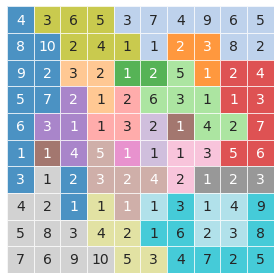

Took 6.4716 seconds
Answer is : 24,405,360


In [5]:
start = time.time()
N = fixed.shape[0]
#set up the solver and variables.
s = Tactic("qffd").solver()
X = np.array(IntVector("x",N**2),dtype=object).reshape((N,N))

#fixed cells
s += [e == int(fixed[i,j]) for (i,j),e in np.ndenumerate(X) if fixed[i,j]!=0]

#1-n in the groups 
group_sizes = np.unique(groups,return_counts=True)[1]
for (g,z) in enumerate(group_sizes):
    s += Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j]==g])
    s += [And(e>0,e<=int(z)) for (i,j),e in np.ndenumerate(X) if groups[i,j]==g]

# taxicab constraints
for n in range(np.max(group_sizes)+1):    
    s += [Implies(e == n, And([X[a,b] != n for a,b in exclude(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]
    s += [Implies(e == n, Or([X[a,b] == n for a,b in force(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]  

#solve - loop through all solutions
while s.check() == sat:
        m = s.model()
        evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
        result =  evalu(X)
        s+= Or([X[i,j] != int(e) for (i,j),e in np.ndenumerate(result)])
        grid_print(groups,result)
        print("Took {:.4f} seconds".format(time.time()- start))
        print("Answer is : {:,.0f}".format(counter(result)))
        

### Solution as published
https://www.janestreet.com/puzzles/block-party-4-solution/

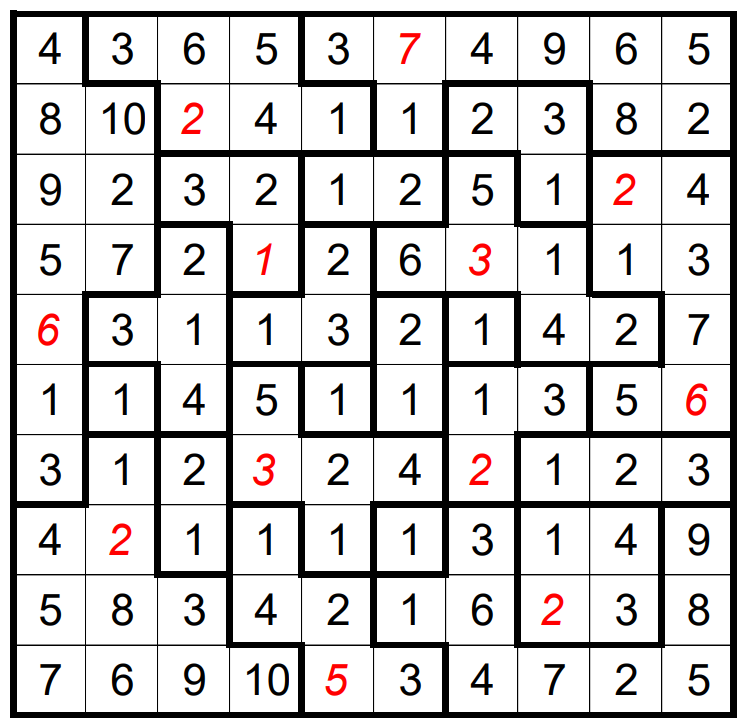

In [6]:
url='https://www.janestreet.com/puzzles/block-party-4-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published\n'+url))
display(Image("https://www.janestreet.com/puzzles/block-party-4-solution.png",width=300))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))